### IMPLEMENTACIÓN DE FILTROS GAUSSIANOS

En este trabajo práctico se busca la implementación de un filtro gaussiano para el filtrado espectral de una imagen. La función desarrollada retorna un filtro Gaussiano de tamaño HxW y su transformada de Fourier. 

In [1]:
#Import libraries
import sys
import numpy as np
np.set_printoptions(threshold = sys.maxsize)
import cv2 as cv
import matplotlib.pyplot as plt
import scipy.stats as st
from PIL import Image

#%matplotlib


### Ejercicio 1

In [2]:
#Reading image
img = cv.imread('./imgs/tp2/img_tp2.png', cv.IMREAD_GRAYSCALE)
h = img.shape[0]
w = img.shape[1]

def create_gauss_filter(h, w, k_size, sigma):
    #2D Kernel generation
    kernel = cv.getGaussianKernel(ksize=k_size, sigma=sigma)
    gaussian_kernel = kernel*kernel.T 
    
    #Padding generation
    w_pad_left, w_pad_right = (((w-k_size)//2),(w-k_size)//2)
    h_pad_top, h_pad_bottom = (((h-k_size)//2)+1,(h-k_size)//2)
    gauss_kernel = np.pad(gaussian_kernel, pad_width=((h_pad_top, h_pad_bottom), (w_pad_left, w_pad_right)))
    gauss_kernel.shape
    
    #Fourier Transform for the Kernel
    kernel_fft = np.fft.fft2(gauss_kernel)

    #Fourier Transform for the image
    img_fft = np.fft.fft2(img)

    #Multiply  img_fft * kernel_fft 
    filter_kernel =  img_fft * kernel_fft

    return gauss_kernel, kernel_fft

In [3]:
gauss_kernel, kernel_fft= create_gauss_filter(h,w,5, 1.5)

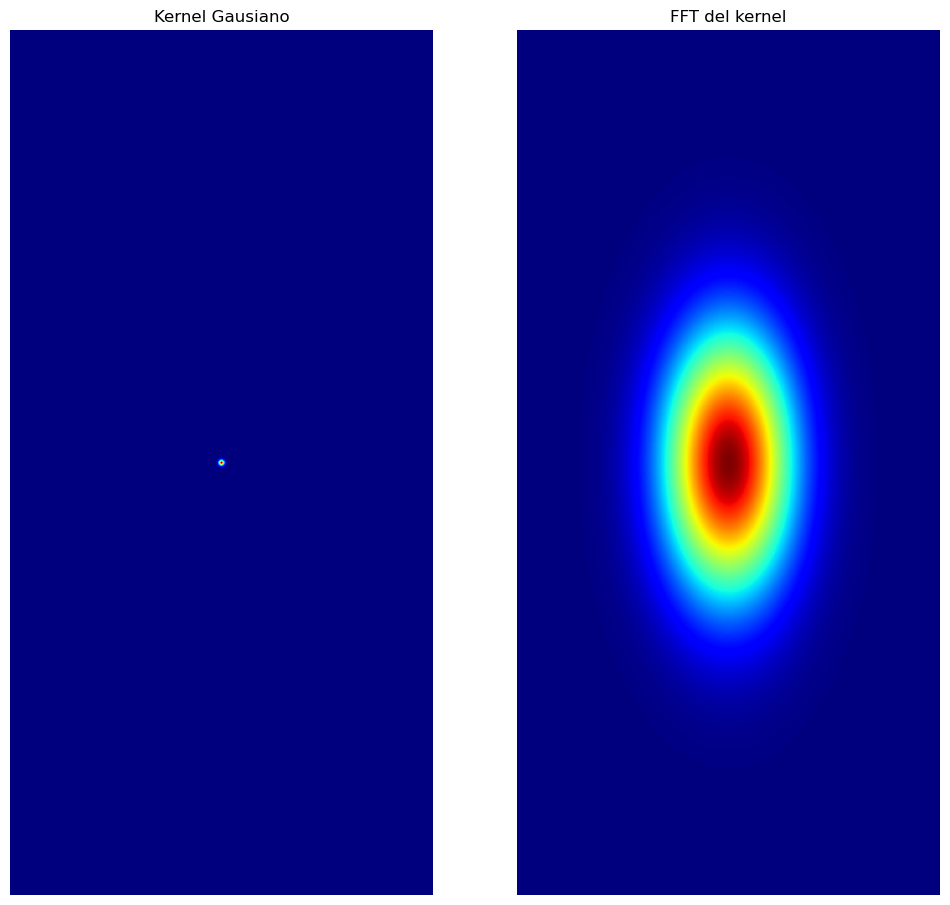

In [4]:
kernel, kernel_tf = create_gauss_filter(h, w, k_size=15, sigma=1.5)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
cv.waitKey(0)
plt.subplot(1,2,2)
plt.axis('off')
plt.title("FFT del kernel")
tf_shifted = np.fft.fftshift(kernel_tf)
plt.imshow(np.abs(tf_shifted), cmap='jet')
cv.waitKey(0)
cv.destroyAllWindows()

Text(0.5, 1.0, 'Desenfoque gausiano')

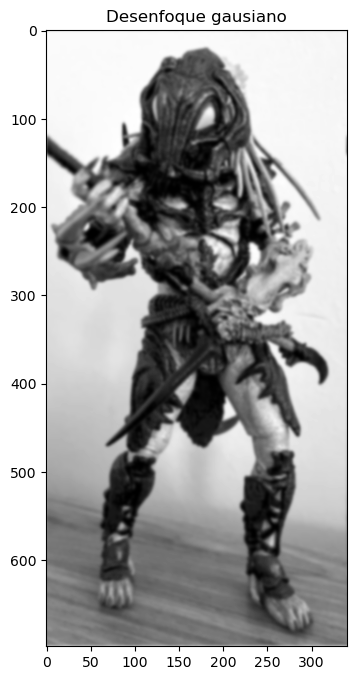

In [5]:
img = cv.imread('./imgs/tp2/img_tp2.png', cv.IMREAD_GRAYSCALE)
img_fft = np.fft.fft2(img)
filtered = img_fft * kernel_tf
img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))
plt.figure(figsize=(8,8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')

### Ejercicio 2

In [6]:
img = cv.imread('./imgs/tp2/lenaImage.png', cv.IMREAD_GRAYSCALE)
h = img.shape[0]
w = img.shape[1]

def create_gauss_filter(h, w, k_size, sigma):
    #2D Kernel generation
    kernel = cv.getGaussianKernel(ksize=k_size, sigma=sigma)
    gaussian_kernel = kernel*kernel.T 
    
    #Padding generation
    w_pad_left, w_pad_right = (((w-k_size)//2)+1,(w-k_size)//2)
    h_pad_top, h_pad_bottom = (((h-k_size)//2)+1,(h-k_size)//2)
    gauss_kernel = np.pad(gaussian_kernel, pad_width=((h_pad_top, h_pad_bottom), (w_pad_left, w_pad_right)))
    gauss_kernel.shape
    
    #Fourier Transform for the Kernel
    kernel_fft = np.fft.fft2(gauss_kernel)

    #Fourier Transform for the image
    img_fft = np.fft.fft2(img)

    #Multiply  img_fft * kernel_fft 
    filter_kernel =  img_fft * kernel_fft

    return gauss_kernel, kernel_fft

In [7]:
def quality_measure(img):
    h = img.shape[0]
    w = img.shape[1]
    #Fourier Transfor for the image
    image_fft = np.fft.fft2(img)
    #Shifted image fft to the center
    shifted_image_fft = np.fft.fftshift(image_fft)
    #Abosluted value of shifted image
    abs_shifted_image = np.abs(shifted_image_fft)
    #Calculate maximun value of frequency component in ab_shifted_iamge
    max_shifted_image = np.max(abs_shifted_image)
    #Total number of pixel > threshold
    threshold = max_shifted_image/1000
    th = np.sum(np.array(image_fft)>=threshold)
    image_quality_measure = th/(h+w)

    return image_quality_measure

In [8]:
img = cv.imread('./imgs/tp2/lenaImage.png', cv.IMREAD_GRAYSCALE)
quality_measure(img)

1.0986328125

Metrica para la imagen obtenida despues de aplicar Gaussian Blur [1.0595703125, 0.9677734375, 0.8623046875, 0.7587890625, 0.6865234375, 0.6396484375, 0.6025390625]
Metrica para la imagen obtenida despues de aplicar desenfoque Gaussiano [1.0615234375, 0.9638671875, 0.8330078125, 0.7451171875, 0.6572265625, 0.6083984375, 0.5712890625]


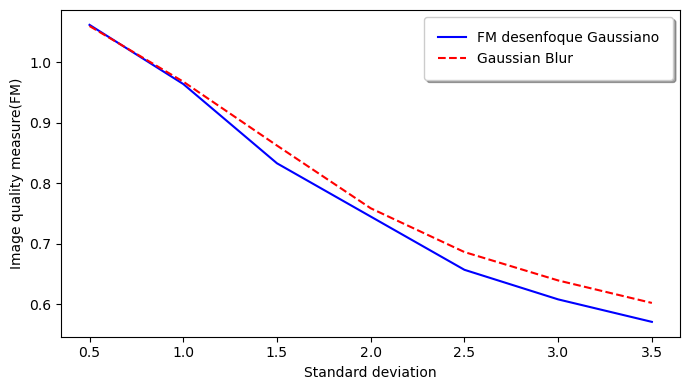

In [9]:
fm_gaussian_blur = []
fm_desenfoque_gaussiano = []
sigma_list = [0.5, 1, 1.5, 2, 2.5, 3, 3.5]
img_desenfoque_gauss = []
img_gassuian_blur = []

img = cv.imread('./imgs/tp2/lenaImage.png', cv.IMREAD_GRAYSCALE)

for sig in sigma_list:
    ksize = 15
    # Gauss Filter
    kernel, kernel_tf = create_gauss_filter(h, w, k_size=ksize, sigma=sig)
    img_fft = np.fft.fft2(img)
    filtered = img_fft * kernel_tf
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered))).astype(np.uint8)
    img_desenfoque_gauss.append(img_gauss)

    #Gaussian Blur
    image_gaussian_blur = cv.GaussianBlur(img, (ksize, ksize), sigmaX=sig)
    img_gassuian_blur.append(image_gaussian_blur)

#Calculate quality image for Gaussian Blur
for i in range(len(img_gassuian_blur)):
    qm_gaussian_blur = quality_measure(img_gassuian_blur[i])
    fm_gaussian_blur.append(qm_gaussian_blur) 
print("Metrica para la imagen obtenida despues de aplicar Gaussian Blur", fm_gaussian_blur)

for j in range(len(img_desenfoque_gauss)):
    qm_desenfoque_gaussiano = quality_measure(img_desenfoque_gauss[j])
    fm_desenfoque_gaussiano.append(qm_desenfoque_gaussiano)
print("Metrica para la imagen obtenida despues de aplicar desenfoque Gaussiano", fm_desenfoque_gaussiano)

#Plotting the results
plt.rcParams["figure.figsize"] = [7, 4]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
ax.plot(sigma_list, fm_desenfoque_gaussiano, '-b', label= 'FM desenfoque Gaussiano')
ax.plot(sigma_list, fm_gaussian_blur, '--r', label = 'Gaussian Blur' )
plt.ylabel('Image quality measure(FM)')
plt.xlabel('Standard deviation')
leg = ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

### Ejercicio 3

Se eligió el método de Tenengrad para la evaluación de las métricas. Este método mide el foco de la imagen basado en la magnitud del gradiente según la siguiente función:

$\phi_{x,y}$ =  $\sum_{(i,j) \in \Omega}(G_{x}(i,j)^2 + G_{y}(i,j)^2)$

Donde $G_{x}$ y $G_{y}$ son los gradientes X e Y obtnenidos al convolusionar la imagen dada con el operador de Sobel. 

In [10]:
import cv2 as cv
def tenengrad(img, k_size):
    gX = cv.Sobel(img, ddepth=cv.CV_32F, dx=1, dy=0, ksize=k_size)
    gY = cv.Sobel(img, ddepth=cv.CV_32F, dx=0, dy=1, ksize=k_size)
    
    #Convertimos el valor de punto flotante a uint8 
    gX = cv.convertScaleAbs(gX)
    gY = cv.convertScaleAbs(gY)

    # Combinamos los gradientes en una sola imagen
    combined = cv.addWeighted(gX, 0.5, gY, 0.5, 0)

    # show our output images
    cv.imshow("Sobel X", gX)
    cv.imshow("Sobel Y", gY)
    cv.imshow("Sobel Combined", combined)
    cv.waitKey(0)
    cv.destroyAllWindows()

    return combined

In [11]:
img = cv.imread('./imgs/tp2/lenaImage.png', cv.IMREAD_GRAYSCALE)
ksize = 3
tenengrad(img, ksize)